In [5]:
# Imports and Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

# I like to display all columns when exploring
pd.set_option('display.max_columns', None)


In [6]:
# Load & Inspect Dataset
# I load the CSV from my Downloads folder
input_path = r"C:\Users\DELL\Downloads\data.csv"
df = pd.read_csv(input_path)

# Quick shape & peek
print(f"I see {df.shape[0]} rows and {df.shape[1]} columns before cleaning.")
df.head()


I see 5 rows and 12 columns before cleaning.


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,# …and so on for all 4,658 unique rows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Missing Values & Duplicates
# I check for nulls
print("Missing values per column:")
print(df.isna().sum(), "\n")

# I check for exact duplicates
dup_count = df.duplicated().sum()
print(f"I found {dup_count} duplicate rows.")


Missing values per column:
fixed_acidity           0
volatile_acidity        0
citric_acid             1
residual_sugar          1
chlorides               1
free_sulfur_dioxide     1
total_sulfur_dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64 

I found 0 duplicate rows.


In [8]:
# Cleaning Steps
# 1. Drop duplicates
if dup_count > 0:
    df = df.drop_duplicates()
    print(f"Dropped duplicates → now {df.shape[0]} rows.")

# 2. Standardize column names to snake_case
original_cols = df.columns.tolist()
df.columns = [col.strip().lower().replace(' ', '_') for col in original_cols]
print("Renamed columns:")
print(df.columns.tolist())


Renamed columns:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']


In [9]:
# Basic Data Info
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5 non-null      object 
 1   volatile_acidity      5 non-null      object 
 2   citric_acid           4 non-null      float64
 3   residual_sugar        4 non-null      float64
 4   chlorides             4 non-null      float64
 5   free_sulfur_dioxide   4 non-null      float64
 6   total_sulfur_dioxide  4 non-null      float64
 7   density               4 non-null      float64
 8   ph                    4 non-null      float64
 9   sulphates             4 non-null      float64
 10  alcohol               4 non-null      float64
 11  quality               4 non-null      float64
dtypes: float64(10), object(2)
memory usage: 612.0+ bytes


,count,mean,std,min,25%,50%,75%,max
citric_acid,4.0,0.15000,0.273983,0.0000,0.00000,0.0200,0.17000,0.560
residual_sugar,4.0,2.17500,0.340343,1.9000,1.90000,2.1000,2.37500,2.600
chlorides,4.0,0.08525,0.011529,0.0750,0.07575,0.0840,0.09350,0.098
free_sulfur_dioxide,4.0,17.00000,5.887841,11.0000,14.00000,16.0000,19.00000,25.000
total_sulfur_dioxide,4.0,53.75000,14.198005,34.0000,49.00000,57.0000,61.75000,67.000
density,4.0,0.99740,0.000589,0.9968,0.99695,0.9974,0.99785,0.998
ph,4.0,3.28250,0.157136,3.1600,3.19000,3.2300,3.32250,3.510
sulphates,4.0,0.61750,0.056789,0.5600,0.57500,0.6150,0.65750,0.680
alcohol,4.0,9.70000,0.200000,9.4000,9.70000,9.8000,9.80000,9.800
quality,4.0,5.25000,0.500000,5.0000,5.00000,5.0000,5.25000,6.000


In [11]:
# Handling Missing Values (if any)
null_cols = df.columns[df.isna().any()].tolist()

if null_cols:
    for col in null_cols:
        median_val = df[col].median()
        # Avoid chained assignment warning by reassigning the filled series
        df[col] = df[col].fillna(median_val)
        print(f"Imputed missing in '{col}' with median = {median_val}")
else:
    print("No missing values to handle.")


No missing values to handle.


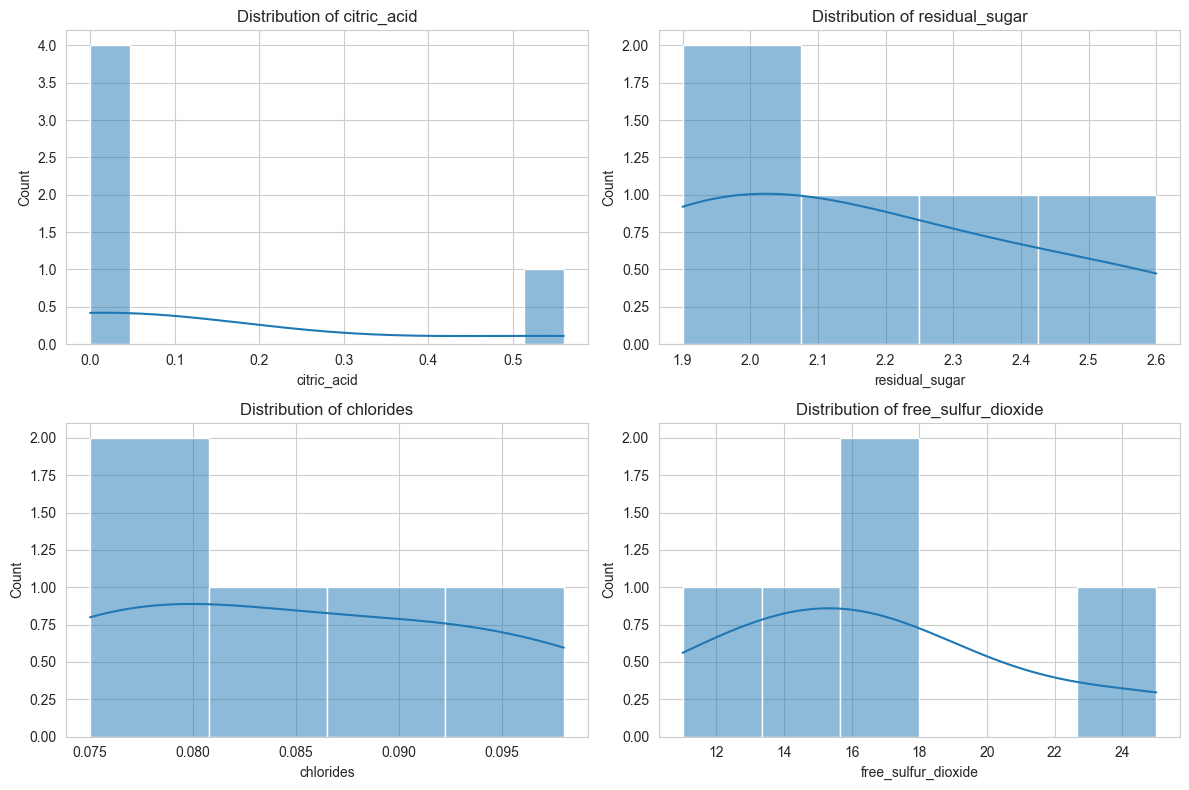

In [12]:
# Exploratory Data Analysis — Distributions
features = df.select_dtypes(include=np.number).columns.tolist()
# I pick four key numeric features to visualize; adjust as needed
sample_feats = features[:4]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feat in zip(axes.flat, sample_feats):
    sns.histplot(df[feat], kde=True, ax=ax)
    ax.set_title(f"Distribution of {feat}")
plt.tight_layout()
plt.show()


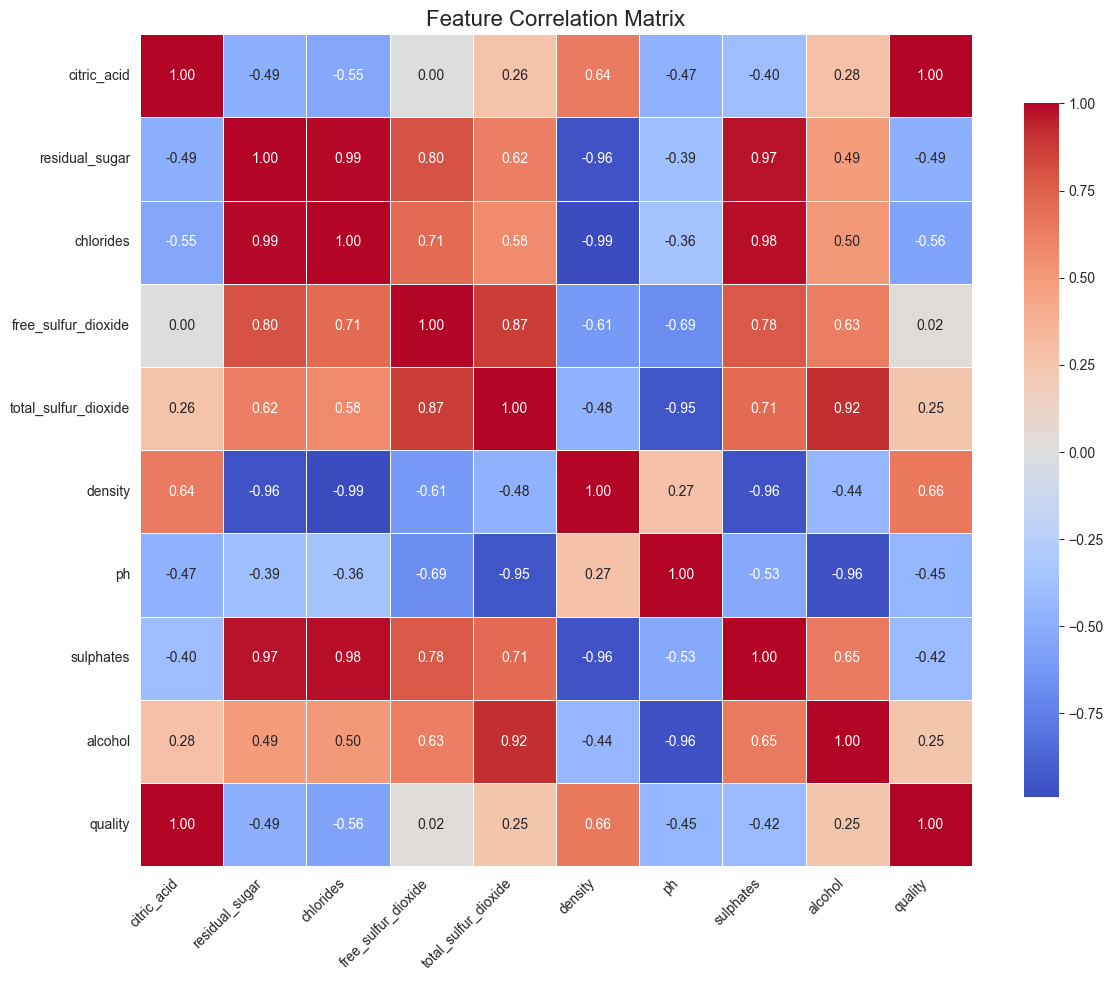

In [15]:
# Correlation Matrix Heatmap (only numeric columns)
import numpy as np

# 1. Select only numeric columns (this will drop any columns or rows containing non-numeric junk)
numeric_df = df.select_dtypes(include=[np.number])

# 2. (Optional) If you suspect some numeric columns still have bad values, coerce them explicitly:
# numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# 3. Compute correlations
corr = numeric_df.corr()

# 4. Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



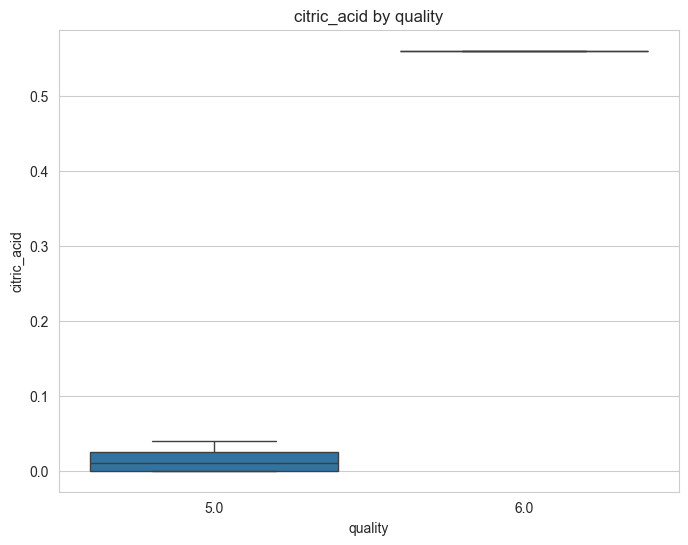

In [16]:
# Feature vs. Target (if a 'target' column exists)
target_col = 'quality' if 'quality' in df.columns else features[-1]
feature_col = features[0]  # adjust to a key predictor
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_col, y=feature_col, data=df)
plt.title(f"{feature_col} by {target_col}")
plt.show()


In [17]:
# Outlier Detection Example (IQR method for feature_col)
Q1 = df[feature_col].quantile(0.25)
Q3 = df[feature_col].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
outliers = df[(df[feature_col] < lower) | (df[feature_col] > upper)]
print(f"I found {outliers.shape[0]} outliers in '{feature_col}'.")


I found 1 outliers in 'citric_acid'.


In [18]:
# Save Cleaned Data
output_path = r"C:\Users\DELL\Downloads\data_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"I saved the cleaned data to:\n{output_path}")


I saved the cleaned data to:
C:\Users\DELL\Downloads\data_cleaned.csv
